# Lead Scoring Case Study

# Problem Statement

There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Attribute Information

Variables	                                 Description


Prospect ID ;	A unique ID with which the customer is identified.

Lead Number ;	A lead number assigned to each lead procured.

Lead Origin ;	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page         Submission, etc.

Lead Source ;	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email ;	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call ;	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

Converted ;	The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits ;	The total number of visits made by the customer on the website.

Total Time ;   Spent on Website	The total time spent by the customer on the website.

Page Views Per Visit ;	Average number of pages on the website viewed during the visits.

Last Activity ;	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

Country ;	The country of the customer.

Specialization ;	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

How did you hear about X Education ;	The source from which the customer heard about X Education.

What is your current occupation ;	Indicates whether the customer is a student, umemployed or employed.

What matters most to you in choosing this course ;	An option selected by the customer indicating what is their main motto behind doing this course.

Search ;	Indicating whether the customer had seen the ad in any of the listed items.

Magazine ;  Indicating whether the customer had seen the ad in any of the listed items.

Newspaper Article ; Indicating whether the customer had seen the ad in any of the listed items.

X Education Forums ; Indicating whether the customer had seen the ad in any of the listed items.

Newspaper ; Indicating whether the customer had seen the ad in any of the listed items.

Digital Advertisement ; Indicating whether the customer had seen the ad in any of the listed items.

Through Recommendations ;	Indicates whether the customer came in through recommendations.

Receive More Updates About Our Courses ;	Indicates whether the customer chose to receive more updates about the courses.

Tags ;	Tags assigned to customers indicating the current status of the lead.

Lead Quality ;	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

Update me on Supply Chain Content ;	Indicates whether the customer wants updates on the Supply Chain Content.

Get updates on DM Content ;	Indicates whether the customer wants updates on the DM Content.

Lead Profile ;	A lead level assigned to each customer based on their profile.

City ;	The city of the customer.

Asymmetrique Activity Index ;	An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Profile Index ;    An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Activity Score ;   An index and score assigned to each customer based on their activity and their profile.

Asymmetrique Profile Score ;    An index and score assigned to each customer based on their activity and their profile.

I agree to pay the amount through cheque ;	Indicates whether the customer has agreed to pay the amount through cheque or not.

a free copy of Mastering The Interview ;	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Last Notable Activity ;	The last notable acitivity performed by the student.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
#Importing Dataset 
df = pd.read_csv("D:\\UPGRAD\\Machine Learning- I\\Module-VIII Group Case Study\\Lead Scoring Assignment\\Leads.csv")
df.head(101)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7f0c404f-3b2d-4d0e-b5e6-cc5bb0bab65d,659555,Landing Page Submission,Google,No,No,0,2.0,511,2.0,Form Submitted on Website,India,Healthcare Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Diploma holder (Not Eligible),NaN,No,No,Select,Mumbai,03.Low,02.Medium,9.0,15.0,No,No,Modified
97,477c8243-bd09-48f5-a170-a5aa9001ab12,659545,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,opp hangup,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
98,bc35eede-4208-461c-827e-11108a378df7,659523,API,Google,No,No,1,5.0,1110,5.0,Olark Chat Conversation,India,Human Resource Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,01.High,02.Medium,16.0,16.0,No,No,Modified
99,35d515d8-e851-4629-803e-492c6b576bd6,659507,Landing Page Submission,Direct Traffic,No,No,1,5.0,1563,5.0,Email Opened,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,Yes,Email Opened


In [3]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df = df.drop(["Tags","Lead Quality","Last Activity","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score","Last Notable Activity"],1)

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [10]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# we will drop the columns having more than 70% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [13]:
# Now we will take care of null values in each column one by one.

In [14]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

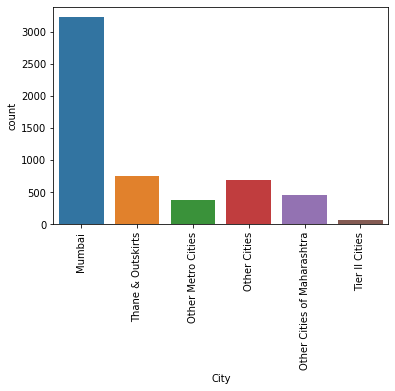

In [17]:
sns.countplot(df.City)
xticks(rotation = 90)

In [18]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [19]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [20]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

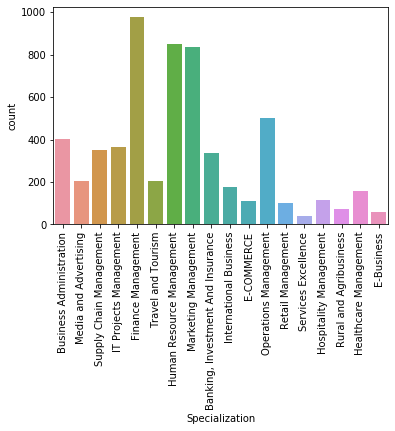

In [21]:
sns.countplot(df.Specialization)
xticks(rotation = 90)

In [22]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [23]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [24]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [25]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [26]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [27]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [28]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [29]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

In [30]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [31]:
# Country is India for most values so let's impute the same in missing values.
df['Country'] = df['Country'].replace(np.nan, 'India')

In [32]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [33]:
# Rest missing values are under 2% so we can drop these rows.
df.dropna(inplace = True)

In [34]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [35]:
df.to_csv('Leads_cleaned')

###    -Now Data is clean and we can start with the analysis part
    -Exploratory Data Analytics
    -Univariate Analysis
    -Converted

In [36]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [37]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

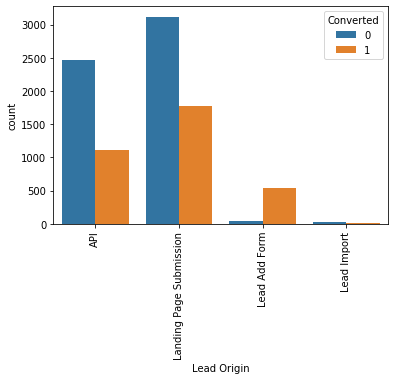

In [38]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)

Inference
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
-  Lead Import are very less in count.
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

# Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

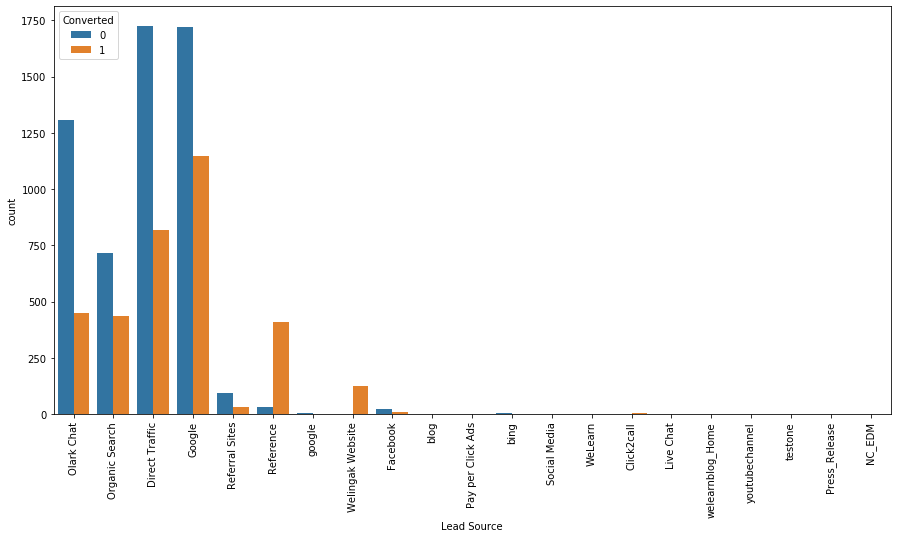

In [39]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [40]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

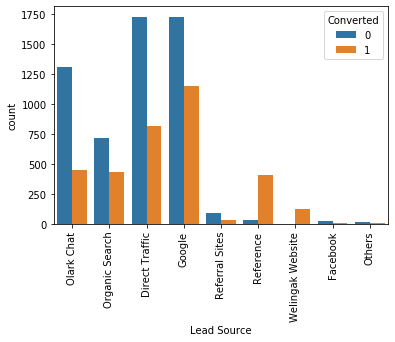

In [41]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

Inference
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

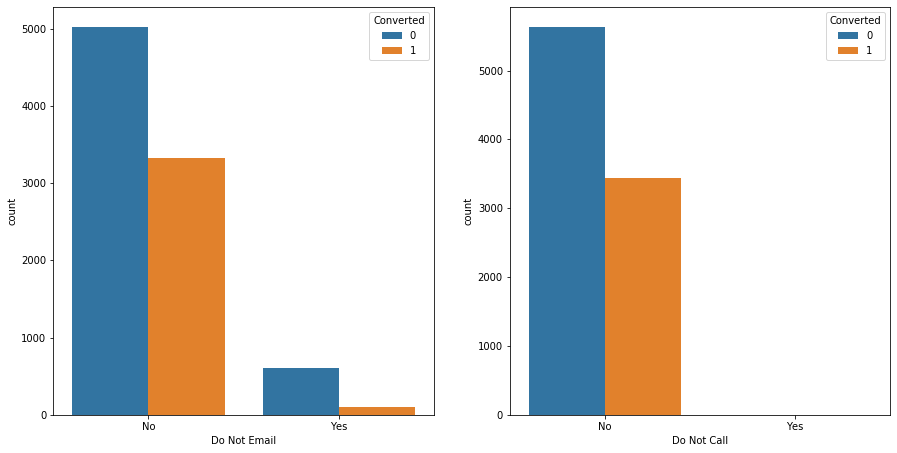

In [42]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

In [43]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

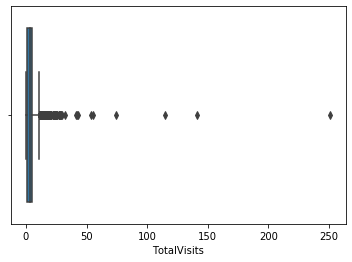

In [44]:
sns.boxplot(df['TotalVisits'])

In [45]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [46]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

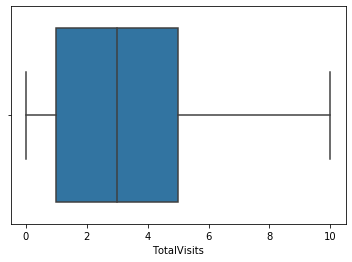

In [47]:
sns.boxplot(df['TotalVisits'])

In [48]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

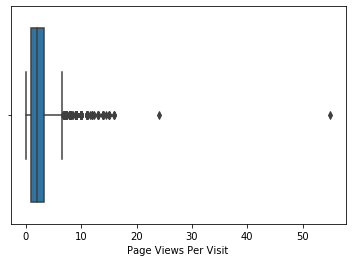

In [49]:
sns.boxplot(df['Page Views Per Visit'])

In [50]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

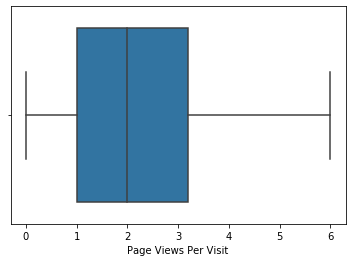

In [51]:
sns.boxplot(df['Page Views Per Visit'])

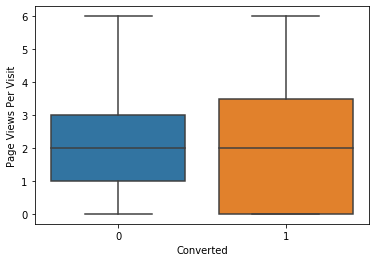

In [52]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [53]:
df.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [54]:
df.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [55]:
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

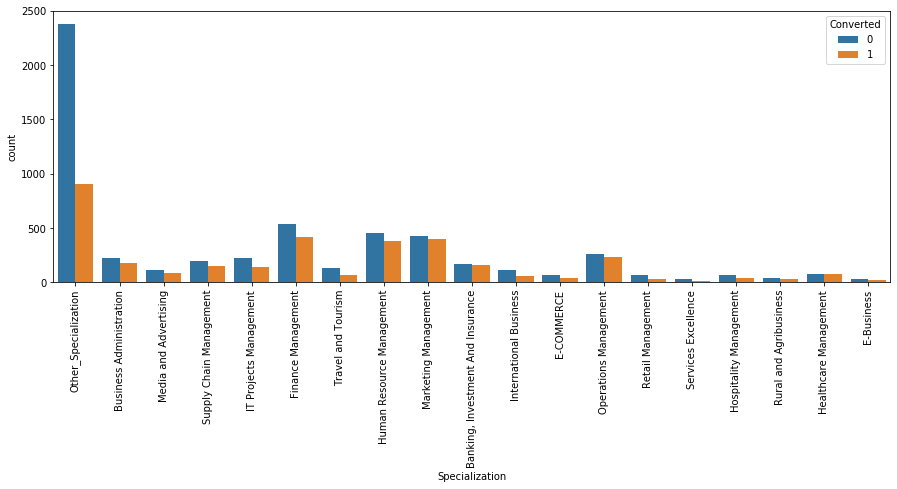

In [56]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

Inference
- Focus should be more on the Specialization with high conversion rate.

Occupation

In [57]:
df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [58]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

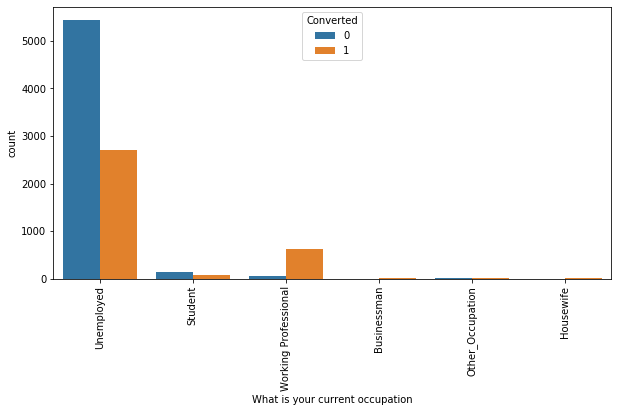

In [59]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

Inference
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

In [60]:
df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

Inference
-Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

In [61]:
df.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [62]:
df.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [63]:
df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

Inference
- - Most entries are 'No'. No Inference can be drawn with this parameter.

In [64]:
df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [65]:
df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [66]:
df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [67]:
df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

In [68]:
df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [69]:
df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [70]:
df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [71]:
df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [72]:
df.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

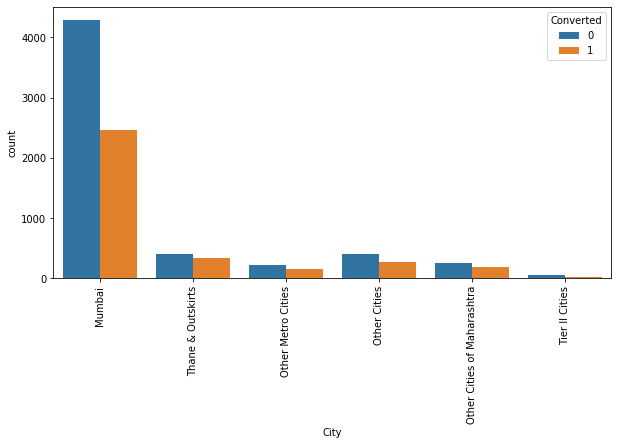

In [73]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
xticks(rotation = 90)

Inference
- Most leads are from mumbai with around 30% conversion rate.

### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [74]:
#we can drop the columns irrelvant due to no inference in our further analysis

df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [75]:
df.shape

(9074, 12)

In [76]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Other_Specialization,Unemployed,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Other_Specialization,Unemployed,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Other_Specialization,Unemployed,Mumbai


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
dtypes: float64(2), int64

In [78]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [79]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [80]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Other_Specialization,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Other_Specialization,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Other_Specialization,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
df= df.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)

In [82]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9074

In [84]:
df.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.004346,-0.140786,0.001856,-0.046192,0.022891,0.099661,-0.031468,-0.016857,-0.017137,-0.070919,-0.051070,0.035510,0.009635,-0.035958,-0.010042,0.002835,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,-0.041663,0.023922,0.028553,0.054570,0.003625,0.061126,-0.009222,-0.001847,0.007534,0.039641,-0.047325,0.012954,-0.004146,0.039438,-0.005637,0.046183
Do Not Call,-0.004346,1.000000,0.019024,0.006986,0.007029,-0.006350,-0.016034,0.026442,-0.000855,-0.000869,0.005854,-0.007266,-0.005668,-0.000748,0.031087,-0.001755,-0.001783,-0.003184,-0.001181,-0.001652,-0.005104,0.055149,-0.001652,-0.004733,-0.003044,-0.002088,0.021162,-0.002240,-0.003582,-0.011177,-0.001567,-0.001337,-0.000988,-0.002956,-0.002240,-0.000468,-0.000604,-0.002263,0.004972,-0.004216,-0.004226,-0.003376,-0.003091,-0.004441,-0.001346
Converted,-0.140786,0.019024,1.000000,0.050742,0.359261,0.000329,-0.037481,0.300775,-0.009328,-0.010651,0.029022,-0.124085,-0.000581,0.001325,0.255480,-0.031812,0.150027,0.026549,-0.001661,-0.006241,0.043580,0.029621,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.161448,-0.008391,0.008560,-0.014207,0.020193,-0.008421,0.040372,0.018578,-0.006074,-0.281174,0.316246,0.012585,0.028551,0.012849,0.041365,-0.007612
TotalVisits,0.001856,0.006986,0.050742,1.000000,0.361207,0.766567,0.454350,-0.276775,-0.060592,-0.059061,0.217347,-0.504613,0.302834,-0.000326,-0.240579,0.090458,-0.129488,0.071805,0.031135,0.040638,0.093082,0.051857,0.030542,0.091691,0.050722,0.062719,0.049837,0.072065,0.050292,-0.403185,0.045108,0.042147,0.027716,0.063664,0.099737,-0.008470,0.034267,-0.031805,0.011394,-0.001040,0.088596,0.065531,0.073821,0.098332,0.023270
Total Time Spent on Website,-0.046192,0.007029,0.359261,0.361207,1.000000,0.364735,0.292571,-0.188526,-0.050742,-0.050248,0.215448,-0.378626,0.100986,-0.002751,-0.162919,0.012533,-0.092049,0.055358,0.019961,-0.001014,0.074854,0.028897,0.036847,0.067162,0.034764,0.023108,0.068158,0.043215,0.062165,-0.296604,0.028783,0.021763,0.003529,0.050945,0.043377,0.006903,0.031444,-0.012423,-0.084584,0.096820,0.055615,0.069355,0.050121,0.076813,0.021938
Page Views Per Visit,0.022891,-0.006350,0.000329,0.766567,0.364735,1.000000,0.554142,-0.308881,-0.066440,-0.063534,0.262680,-0.579202,0.311582,-0.001061,-0.267668,0.079063,-0.144537,0.067490,0.041164,0.046688,0.107434,0.044464,0.037513,0.097286,0.073994,0.080554,0.068629,0.075888,0.063652,-0.460957,0.046557,0.029866,0.020921,0.074258,0.116568,-0.007611,0.020208,-0.036754,0.023001,-0.008830,0.101167,0.090136,0.101161,0.099137,0.032651
Lead Origi

                                                    Do Not Email  Do Not Call  \
Do Not Email                                            1.000000    -0.004346   
Do Not Call                                            -0.004346     1.000000   
Converted                                              -0.140786     0.019024   
TotalVisits                                             0.001856     0.006986   
Total Time Spent on Website                            -0.046192     0.007029   
Page Views Per Visit                                    0.022891    -0.006350   
Lead Origin_Landing Page Submission                     0.099661    -0.016034   
Lead Origin_Lead Add Form                              -0.031468     0.026442   
Lead Origin_Lead Import                                -0.016857    -0.000855   
Lead Source_Facebook                                   -0.017137    -0.000869   
Lead Source_Google                                     -0.070919     0.005854   
Lead Source_Olark Chat      

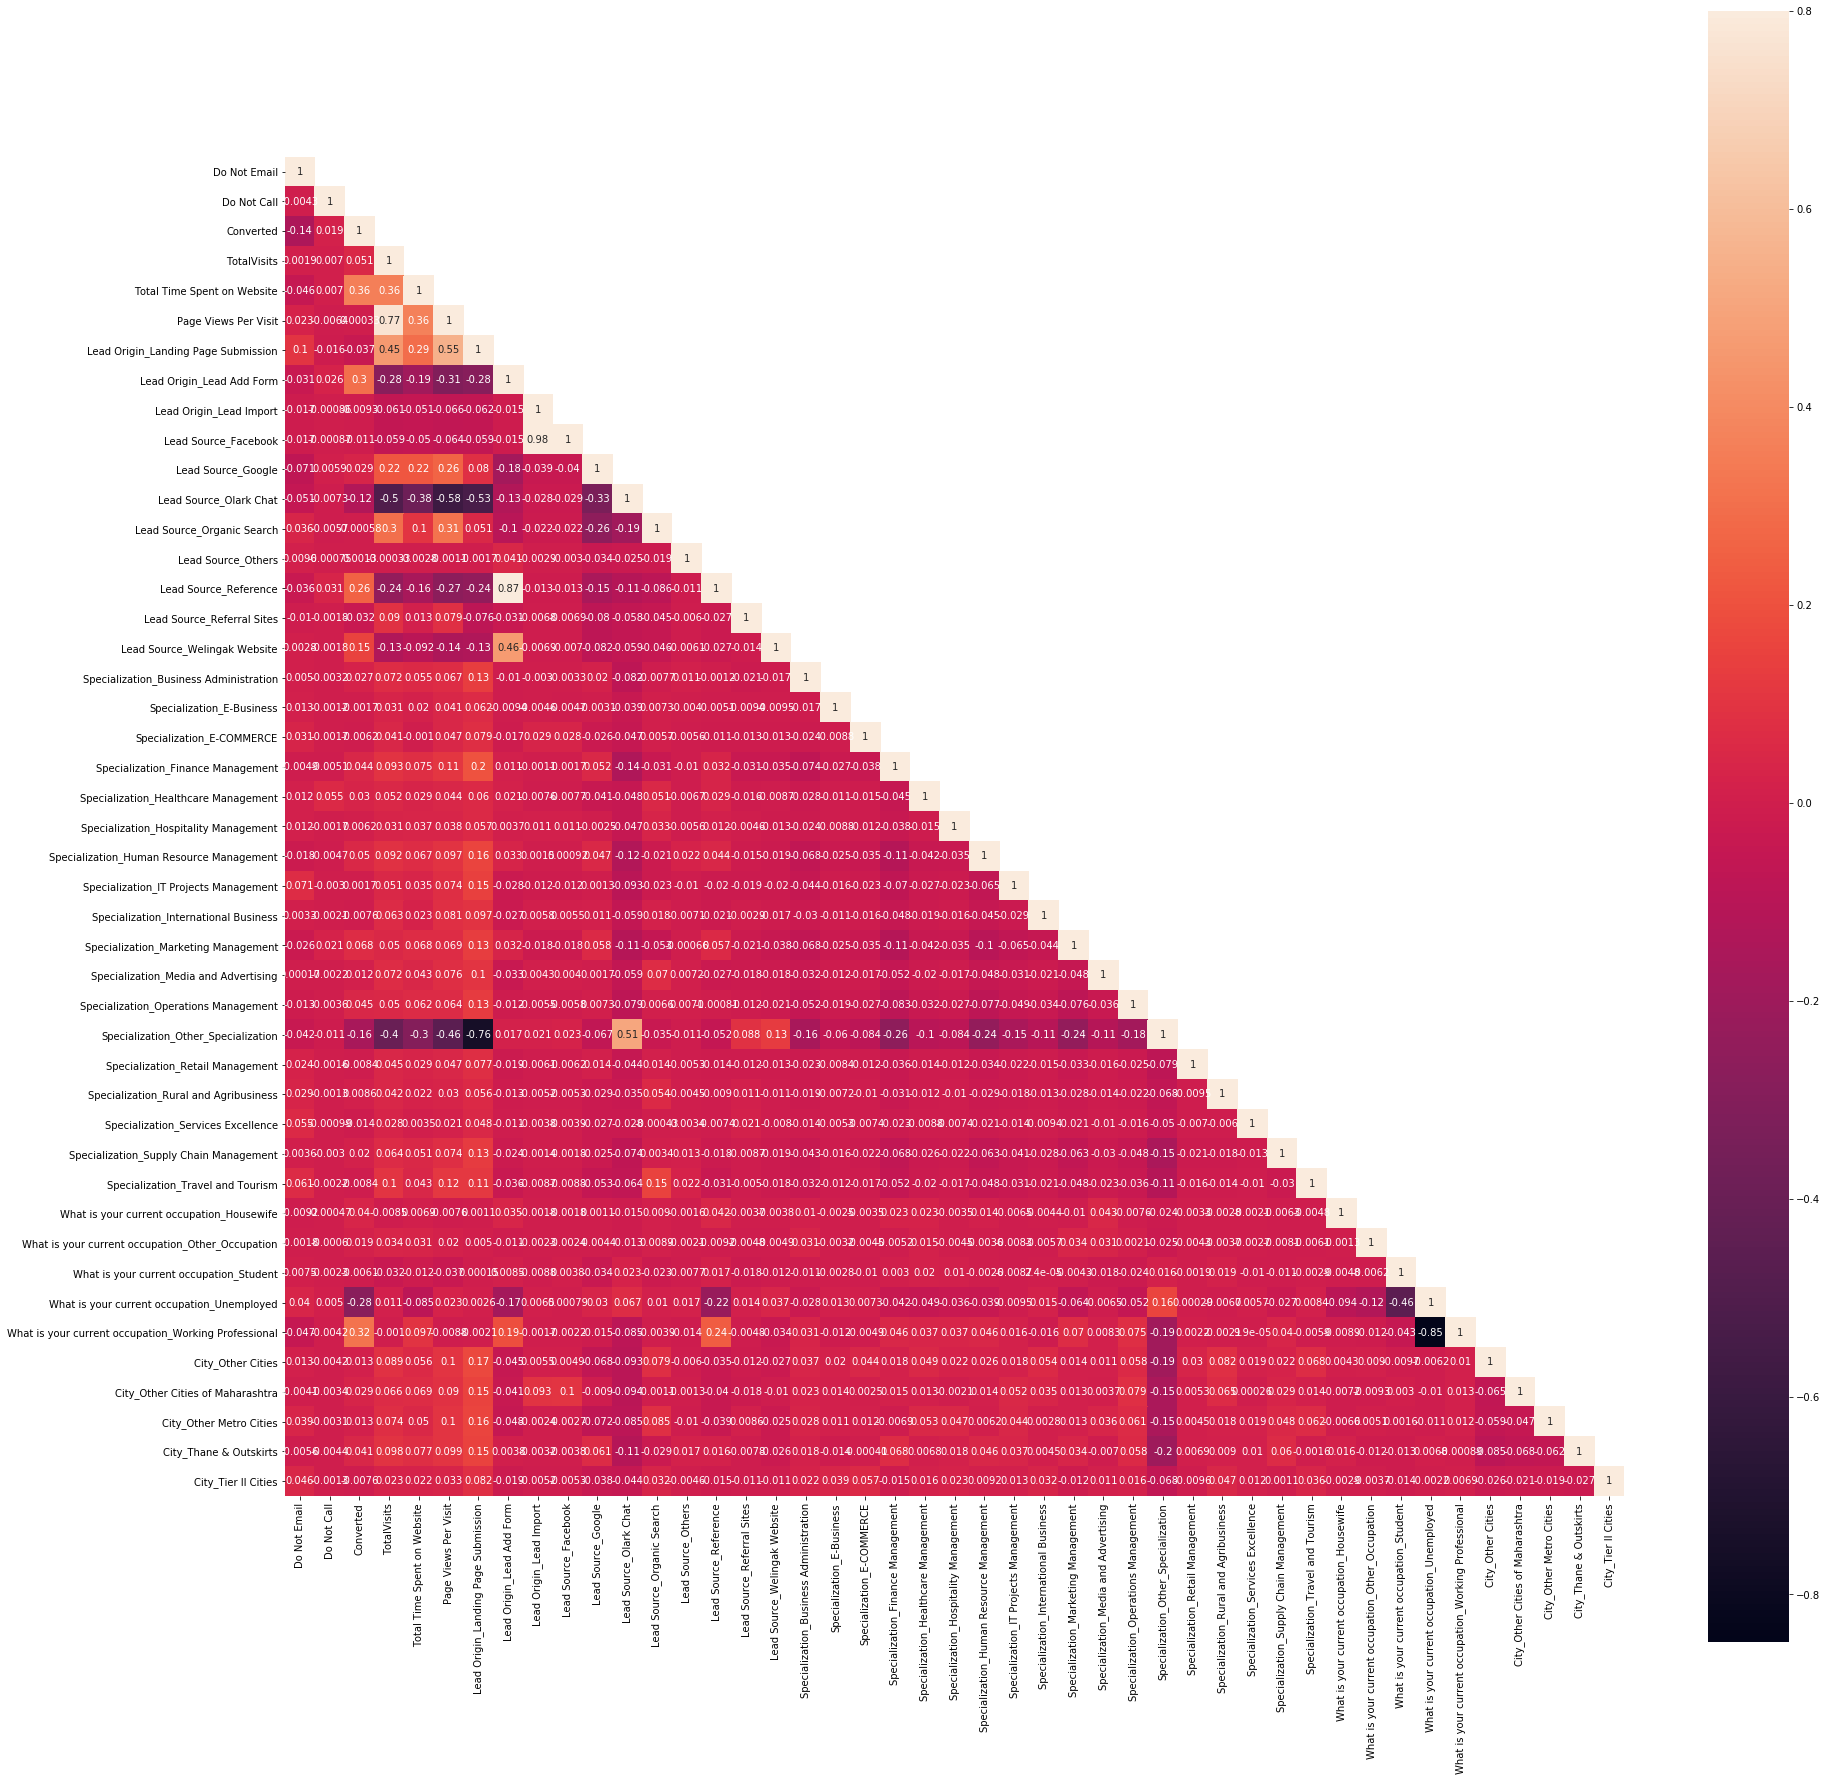

In [85]:
cor = df.corr()
print(cor)
#Masking upper half of the map:
mask = np.array(cor)
mask[np.tril_indices_from(mask)]= False
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(cor,mask=mask,vmax= 0.8,square=True,annot=True);

In [86]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                             0.0
Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Others                                      0.0
Lead Source_Reference                                   0.0
Lead Source_Referral Sites              

In [87]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)

In [88]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [92]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9074

In [94]:
np.asarray(df)

array([['7927b2df-8bba-4d29-b9a2-b6e0beafe620', 0, 0, ..., 0, 0, 0],
       ['2a272436-5132-4136-86fa-dcc88c88f482', 0, 0, ..., 0, 0, 0],
       ['8cc8c611-a219-4f35-ad23-fdfd2656bd8a', 0, 0, ..., 0, 0, 0],
       ...,
       ['aac550fe-a586-452d-8d3c-f1b62c94e02c', 1, 0, ..., 0, 0, 0],
       ['5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9', 0, 0, ..., 1, 0, 0],
       ['571b5c8e-a5b2-4d57-8574-f2ffb06fdeff', 0, 0, ..., 0, 0, 0]],
      dtype=object)

In [95]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.7
Date:                Mon, 11 Jan 2021   Deviance:                       5833.4
Time:                        23:31:50   Pearson chi2:                 6.77e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5400      1.075      0.503      0.615      -1.566       2.646
Do Not Email                                            -1.4192      0.165     -8.584      0.000      -1.743      -1.095
Do Not Call                                             20.0493   3.36e+04      0.001      1.000   -6.58e+04    6.58e+04
TotalVisits                                              0.2134      0.051      4.226      0.000       0.114       0.312
Total Time Spent on Website                              1.1142      0.039     28.834      0.000       1.038       1.190
Page Views Per Visit                                    -0.1341      0.058     -2.322      0.020      -0.247      -0.021
Lead Origin_Landing Page Submission                     -0.7937      0.128     -6.209      0.000      -1.044      -0.543
Lead Origin_Lead Add Form                                1.7821      1.094      1.629      0.103      -0.361       3.926
Lead Origin_Lead Import                                 21.5716   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -20.3675   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3407      0.092      3.722      0.000       0.161       0.520
Lead Source_Olark Chat                                   1.2193      0.148      8.256      0.000       0.930       1.509
Lead Source_Organic Search                               0.2170      0.122      1.774      0.076      -0.023       0.457
Lead Source_Others                                       0.5750      0.656      0.876      0.381      -0.711       1.861
Lead Source_Reference                                    2.3332      1.115      2.093      0.036       0.148       4.518
Lead Source_Referral Sites                              -0.2854      0.336     -0.850      0.395      -0.943       0.373
Lead Source_Welingak Website                             4.8544      1.310      3.706      0.000       2.287       7.422
Specialization_Business Administration                  -0.3507      0.231     -1.518      0.129      -0.804       0.102
Specialization_E-Business                               -0.0516      0.432     -0.119      0.905      -0.899       0.795
Specialization_E-COMMERCE                                0.0143      0.336      0.043      0.966      -0.644       0.672
Specialization_Finance Management                       -0.2573      0.192     -1.337      0.181      -0.635       0.120
Specialization_Healthcare Management                    -0.3279      0.303     -1.084      0.278      -0.921       0.265
Specialization_Hospitality Management                   -0

## Feature Selection Using RFE

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_Finance Management', False, 20),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Mana

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management',
       'Specialization_Other_Specialization',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2937.8
Date:                Mon, 11 Jan 2021   Deviance:                       5875.6
Time:                        23:31:54   Pearson chi2:                 6.80e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7289      1.062      0.686      0.493      -1.353       2.810
Do Not Email                                            -1.4605      0.164     -8.932      0.000      -1.781      -1.140
Total Time Spent on Website                              1.1121      0.038     29.041      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9478      0.121     -7.811      0.000      -1.186      -0.710
Lead Origin_Lead Add Form                                1.8972      0.951      1.995      0.046       0.033       3.762
Lead Origin_Lead Import                                 21.2336   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -20.3979   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   0.8471      0.113      7.497      0.000       0.626       1.069
Lead Source_Reference                                    1.8163      0.974      1.866      0.062      -0.092       3.724
Lead Source_Referral Sites                              -0.4850      0.324     -1.499      0.134      -1.119       0.149
Lead Source_Welingak Website                             4.3688      1.192      3.665      0.000       2.032       6.705
Specialization_Hospitality Management                   -0.4621      0.307     -1.505      0.132      -1.064       0.140
Specialization_Other_Specialization                     -1.1947      0.117    -10.168      0.000      -1.425      -0.964
Specialization_Services Excellence                      -0.4146      0.610     -0.679      0.497      -1.611       0.782
Specialization_Travel and Tourism                       -0.2724      0.231     -1.180      0.238      -0.725       0.180
What is your current occupation_Housewife               21.6603   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Other_Occupation        -0.5024      1.283     -0.392      0.695      -3.017       2.012
What is your current occupation_Student                 -0.5579      1.082     -0.516      0.606      -2.679       1.563
What is your current occupation_Unemployed              -0.7805      1.062     -0.735      0.462      -2.862       1.301
What is your current occupation_Working Professional     1.8857      1.077      1.751      0.080      -0.224       3.996
City_Tier II Cities                                     -0.6201      0.418     -1.483      0.138      -1.440       0.199
========================================================================================================================
"""

In [102]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.3
Date:                Mon, 11 Jan 2021   Deviance:                       5878.6
Time:                        23:31:54   Pearson chi2:                 6.80e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [104]:
col2 = col1.drop('Lead Origin_Lead Import',1)

In [105]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.5
Date:                Mon, 11 Jan 2021   Deviance:                       5879.1
Time:                        23:31:54   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [106]:
col3 = col2.drop('Specialization_Services Excellence',1)

In [107]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.8
Date:                Mon, 11 Jan 2021   Deviance:                       5879.6
Time:                        23:31:55   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [108]:
col4 = col3.drop('What is your current occupation_Working Professional',1)
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2940.2
Date:                Mon, 11 Jan 2021   Deviance:                       5880.4
Time:                        23:31:55   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [109]:
col5 = col4.drop('Specialization_Travel and Tourism',1)
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2940.9
Date:                Mon, 11 Jan 2021   Deviance:                       5881.8
Time:                        23:31:55   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [110]:
col6 = col5.drop('Specialization_Hospitality Management',1)
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.0
Date:                Mon, 11 Jan 2021   Deviance:                       5884.0
Time:                        23:31:55   Pearson chi2:                 6.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [111]:
col7 = col6.drop('Lead Source_Referral Sites',1)
X_train_sm = sm.add_constant(X_train[col7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2943.2
Date:                Mon, 11 Jan 2021   Deviance:                       5886.3
Time:                        23:31:55   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [112]:
col8 = col7.drop('City_Tier II Cities',1)
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.4
Date:                Mon, 11 Jan 2021   Deviance:                       5888.8
Time:                        23:31:55   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [113]:
col9 = col8.drop('Lead Source_Facebook',1)
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.4
Date:                Mon, 11 Jan 2021   Deviance:                       5888.8
Time:                        23:31:55   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [114]:
col10 = col9.drop('Lead Source_Reference',1)
X_train_sm = sm.add_constant(X_train[col10])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.3
Date:                Mon, 11 Jan 2021   Deviance:                       5894.5
Time:                        23:31:55   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.231765
1012    0.156700
9226    0.199361
4750    0.688335
7987    0.769498
1281    0.497597
2880    0.119808
4971    0.885908
7536    0.881152
1248    0.736778
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2317652 , 0.15669958, 0.19936061, 0.68833514, 0.76949769,
       0.49759747, 0.11980767, 0.88590845, 0.88115196, 0.73677811])

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.231765,3009
1,0,0.156700,1012
2,0,0.199361,9226
3,1,0.688335,4750
4,1,0.769498,7987


In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.231765,3009,0
1,0,0.156700,1012,0
2,0,0.199361,9226,0
3,1,0.688335,4750,1
4,1,0.769498,7987,1


In [119]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3428  477]
 [ 880 1566]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7863328609667769


In [121]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col10].columns
vif['VIF'] = [variance_inflation_factor(X_train[col10].values, i) for i in range(X_train[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,7.77
2,Lead Origin_Landing Page Submission,4.83
6,Specialization_Other_Specialization,3.80
4,Lead Source_Olark Chat,1.97
3,Lead Origin_Lead Add Form,1.48
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.24
8,What is your current occupation_Student,1.19
0,Do Not Email,1.11
7,What is your current occupation_Other_Occupation,1.01


In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.231765
1012    0.156700
9226    0.199361
4750    0.688335
7987    0.769498
1281    0.497597
2880    0.119808
4971    0.885908
7536    0.881152
1248    0.736778
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2317652 , 0.15669958, 0.19936061, 0.68833514, 0.76949769,
       0.49759747, 0.11980767, 0.88590845, 0.88115196, 0.73677811])

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.231765,3009
1,0,0.156700,1012
2,0,0.199361,9226
3,1,0.688335,4750
4,1,0.769498,7987


In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.231765,3009,0
1,0,0.156700,1012,0
2,0,0.199361,9226,0
3,1,0.688335,4750,1
4,1,0.769498,7987,1


In [127]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3428  477]
 [ 880 1566]]


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7863328609667769


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
TP / float(TP+FN)

0.6402289452166803

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.8778489116517285

In [132]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12215108834827144


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.7665198237885462


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7957288765088208


 Plotting the ROC Curve--- 
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

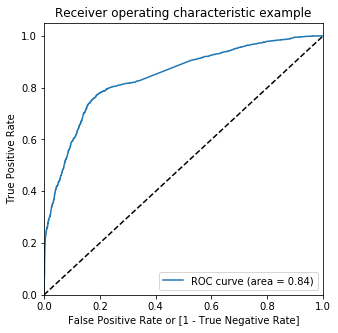

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.231765,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.156700,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.199361,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.688335,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.769498,7987,1,1,1,1,1,1,1,1,1,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.450008  0.991823  0.110627
0.2   0.2  0.725083  0.826247  0.661716
0.3   0.3  0.794206  0.775552  0.805890
0.4   0.4  0.800346  0.727719  0.845839
0.5   0.5  0.786333  0.640229  0.877849
0.6   0.6  0.773422  0.549060  0.913956
0.7   0.7  0.750905  0.441946  0.944430
0.8   0.8  0.728862  0.339330  0.972855
0.9   0.9  0.704928  0.247343  0.991549


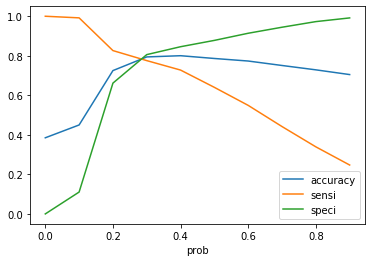

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [142]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.231765,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.156700,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.199361,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.688335,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.769498,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [144]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.231765,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.156700,1012,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.199361,9226,0,1,1,0,0,0,0,0,0,0,0,0,20
3,1,0.688335,4750,1,1,1,1,1,1,1,1,0,0,0,1,69
4,1,0.769498,7987,1,1,1,1,1,1,1,1,1,0,0,1,77


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7755519215044971

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8058898847631242

In [148]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1941101152368758


In [149]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7145009416195857


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.851461038961039


# Precision and Recall

In [151]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3428,  477],
       [ 880, 1566]], dtype=int64)

In [152]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7665198237885462

In [153]:
##### Recall
TP / (TP + FN)

0.7755519215044971

In [154]:
from sklearn.metrics import precision_score, recall_score

In [155]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7665198237885462

In [156]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6402289452166803

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

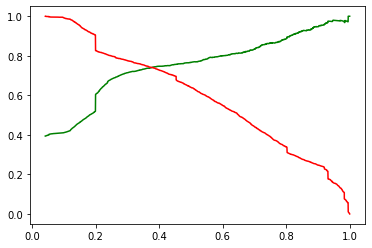

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [161]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [162]:
X_test = X_test[col10]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Other_Specialization,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed
3271,0,-0.591008,0,0,0,0,1,0,0,1
1490,0,1.894051,1,0,0,0,0,0,0,0
7936,0,-0.743117,0,0,0,0,1,0,0,1
4216,0,-0.878732,0,1,0,0,0,0,1,0
3830,0,-0.578179,1,0,0,0,0,0,0,1


In [163]:
X_test_sm = sm.add_constant(X_test)

In [164]:
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:10]

3271    0.129258
1490    0.975761
7936    0.111508
4216    0.944682
3830    0.159807
1800    0.687500
6507    0.150528
4821    0.351638
4223    0.803875
4714    0.201114
dtype: float64

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

,0
3271,0.129258
1490,0.975761
7936,0.111508
4216,0.944682
3830,0.159807


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129258
1,1,1490,0.975761
2,0,7936,0.111508
3,1,4216,0.944682
4,0,3830,0.159807


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.129258
1,1490,1,0.975761
2,7936,0,0.111508
3,4216,1,0.944682
4,3830,0,0.159807


In [176]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [177]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.129258,0
1,1490,1,0.975761,1
2,7936,0,0.111508,0
3,4216,1,0.944682,1
4,3830,0,0.159807,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7961806830701432

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1402,  332],
       [ 223,  766]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity/RECALL of our logistic regression model
TP / float(TP+FN)

0.7745197168857432

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085351787773933

In [183]:
##### Precision
TP / (TP + FP)
#confusion2[1,1]/(confusion[0,1]+confusion[1,1])

0.697632058287796

In [184]:
##### Recall
TP / (TP + FN)

0.7745197168857432

In [185]:
## F Score 
TP /(TP+0.5*(FP+FN))

0.7340680402491615

# Conclusion:

The Accuracy, Precision and Recall score we got from test set in aceptable range.

We have high recall score than precision score which we were exactly looking for.

In regard to business perspective, this can be remodelled with the company’s requirements in coming future.

The final columns considerable for evaluation and modeling : 

     
 - What is your current occupation_Unemployed	
 - Lead Origin_Landing Page Submission	
 - Specialization_Other_Specialization	
- Lead Source_Olark Chat	
- 	Lead Origin_Lead Add Form	
- 	Lead Source_Welingak Website	
- 	Total Time Spent on Website	
- 	What is your current occupation_Student	
- 	Do Not Email	
- 	What is your current occupation_Other_Occupation	